In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import joblib
import pandas as pd
import seaborn as sns
from matplotlib import pyplot

sns.set()

In [3]:
INPUT_PATH = '../input/'
META_PATH = '../meta/'
IMG_PATH = '../img/'

In [4]:
leaderboard = pd.read_csv(INPUT_PATH + 'leaderboard.csv')
leaderboard['label'] = leaderboard.estimator.apply(lambda x: ''.join([char for char in x if char.isupper()]))
leaderboard.sort_values('metric', ascending=False).reset_index(drop=True).head()

,id,estimator,pipe,total_folds,fold,loss,metric,label
0,99793414,SVR,pipe8,5,1,1.911320,0.896238,SVR
1,41255138,GradientBoostingRegressor,pipe5,5,5,2.192516,0.883805,GBR
2,53996601,GradientBoostingRegressor,pipe8,5,4,1.962394,0.879600,GBR
3,96885344,ExtraTreesRegressor,pipe8,5,5,2.132979,0.877135,ETR
4,1372293,ExtraTreesRegressor,pipe5,5,5,2.068252,0.877034,ETR


In [5]:
leaderboard.shape

(440, 8)

In [6]:
pipes = []
for f in os.listdir(META_PATH):
    if not 'cv' in f:
        if f.startswith('pipe'):
            pipes.append(f.replace('.pkl', ''))

pipes

['pipe8',
 'pipe10',
 'pipe5',
 'pipe4',
 'pipe7',
 'pipe6',
 'pipe11',
 'pipe1',
 'pipe3',
 'pipe2',
 'pipe9']

In [7]:
d = {}
for pipe in pipes:
    l = []
    for c,m in zip(pipe, list(map(str.isdigit, list(pipe)))):
        if m:
            l.append(c)

    d[pipe] = int(''.join(l))
    
pipes =  [el[0] for el in sorted(d.items(), key=lambda kv: kv[1])]
pipes

['pipe1',
 'pipe2',
 'pipe3',
 'pipe4',
 'pipe5',
 'pipe6',
 'pipe7',
 'pipe8',
 'pipe9',
 'pipe10',
 'pipe11']

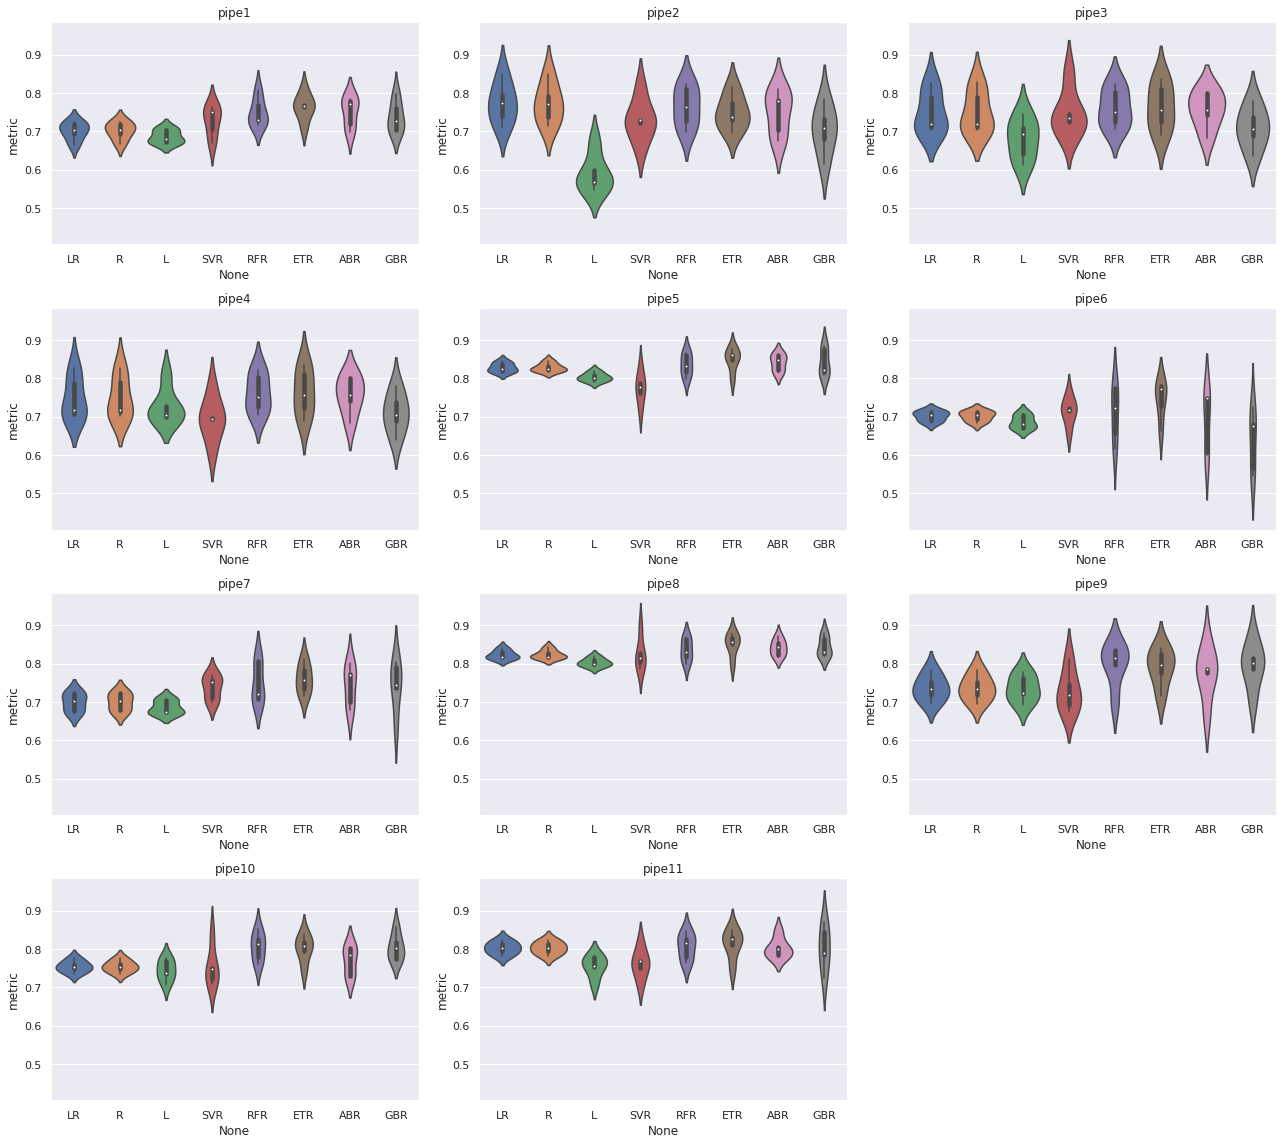

In [8]:
fig = pyplot.figure(1, (18, 16))

for i,pipe in enumerate(pipes):
    df_pipe = leaderboard[leaderboard['pipe'] == pipe]
    
    if i==0:
        ax = pyplot.subplot(4,3,i+1)
    else:
        ax = pyplot.subplot(4,3,i+1, sharey=ax)

    sns.violinplot(x='label', y='metric', data=df_pipe)
    ax.set_title(pipe)
    ax.set_xlabel(None)
    pyplot.tight_layout()
        
pyplot.savefig(IMG_PATH + 'model_distmetric_by_pipes.png')
pyplot.show()

del fig
del ax

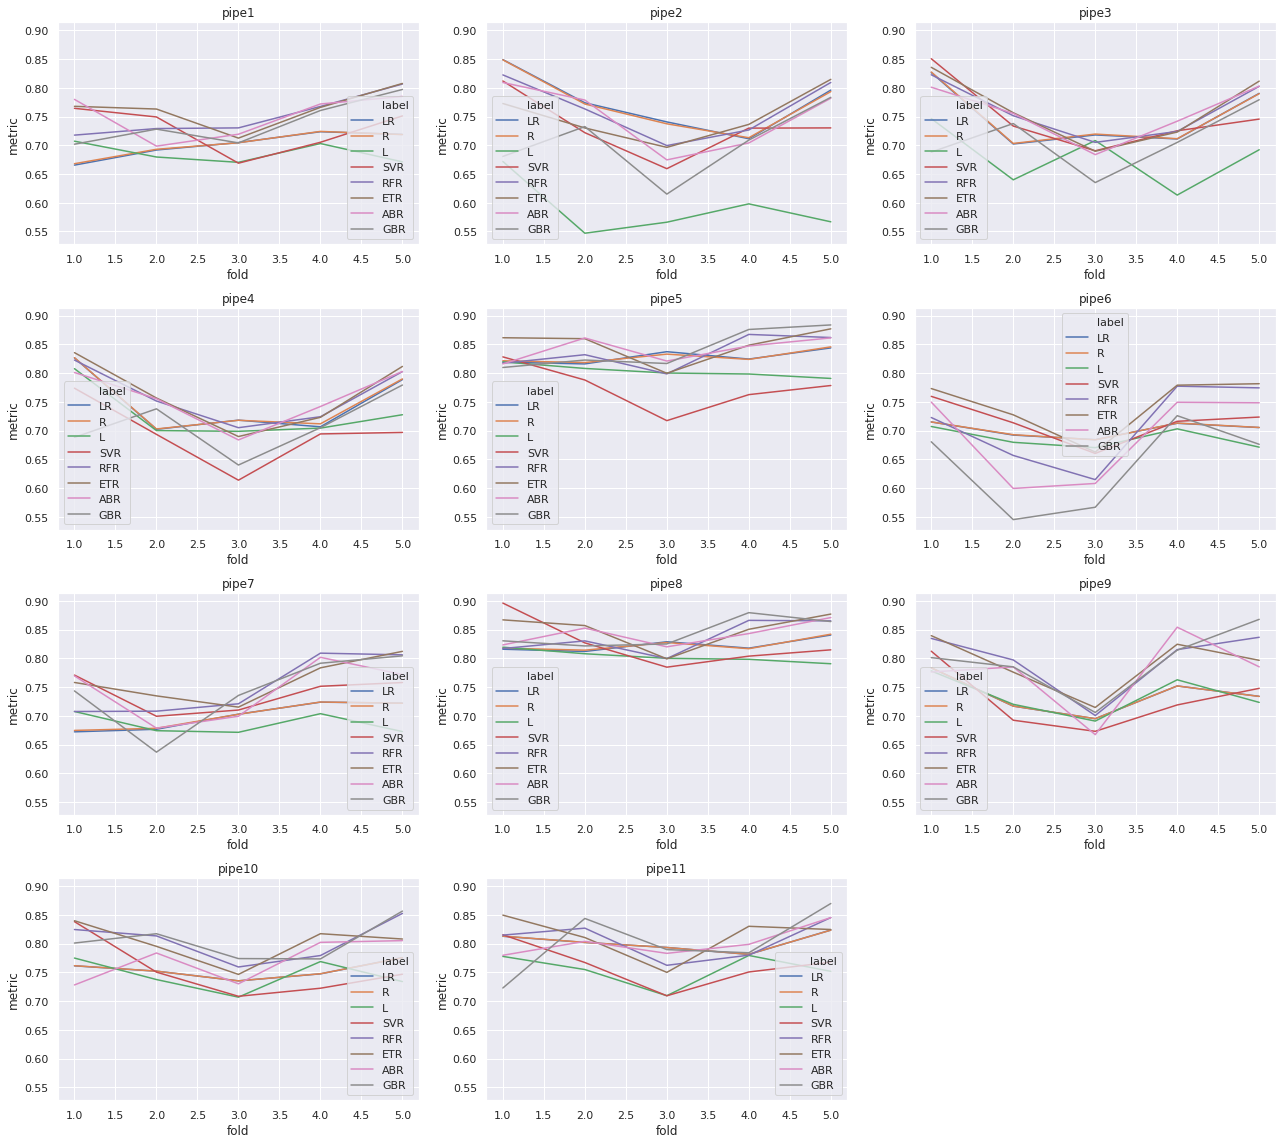

In [9]:
fig = pyplot.figure(1, (18, 16))

for i,pipe in enumerate(pipes):
    df_pipe = leaderboard[leaderboard['pipe'] == pipe]
    
    if i==0:
        ax = pyplot.subplot(4,3,i+1)
    else:
        ax = pyplot.subplot(4,3,i+1, sharey=ax)

    sns.lineplot(x='fold', y='metric', hue='label', #style='label',
                 markers=True, dashes=True, ci=70, data=df_pipe)
    ax.set_title(pipe)
    pyplot.tight_layout()
        
pyplot.savefig(IMG_PATH + 'model_cvmetric_by_pipe.png')
pyplot.show()

del fig
del ax

In [10]:
model_prediction_files = []
for f in os.listdir(INPUT_PATH):
    if f.startswith('pred'):
        model_prediction_files.append(f)

model_prediction_files

['pred_Lasso.csv',
 'pred_SVR.csv',
 'pred_AdaBoostRegressor.csv',
 'pred_LinearRegression.csv',
 'pred_ExtraTreesRegressor.csv',
 'pred_Ridge.csv',
 'pred_RandomForestRegressor.csv',
 'pred_GradientBoostingRegressor.csv']

In [11]:
pd.read_csv(INPUT_PATH + model_prediction_files[0]).tail()

,fold,true,pred
289,5,19.0,19.491849
290,5,27.2,29.444305
291,5,21.0,22.775893
292,5,31.5,30.472512
293,5,14.0,13.850258


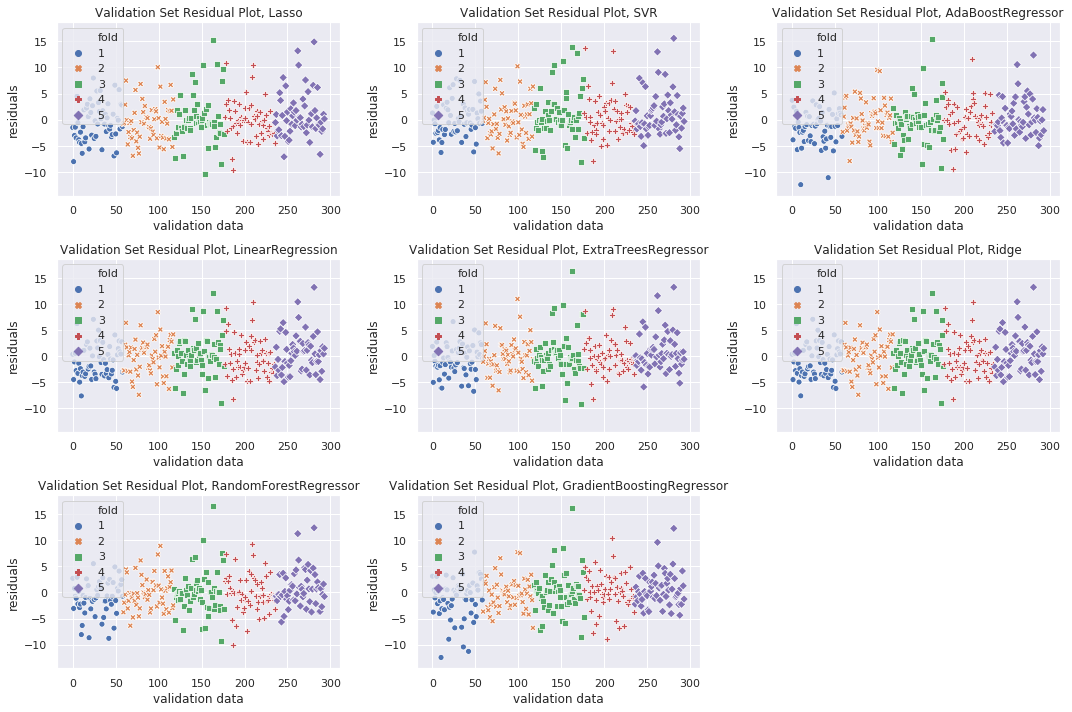

In [14]:
fig = pyplot.figure(1, (15,10))

for i,f in enumerate(model_prediction_files):
    if i==0:
        ax = pyplot.subplot(3,3,i+1)
    else:
        ax = pyplot.subplot(3,3,i+1, sharex=ax, sharey=ax)
    
    df = pd.read_csv(INPUT_PATH + f)
    sns.scatterplot(x=df.index, y=(df.true - df.pred), hue='fold', style='fold', data=df,
                    palette=sns.color_palette(n_colors=5))
    ax.set_xlabel('validation data')
    ax.set_ylabel('residuals')
    pyplot.title("Validation Set Residual Plot, {}".format(f.split('.')[0].split('_')[1]))
    pyplot.tight_layout()

pyplot.savefig(IMG_PATH + 'model_validation_residual_plot.png')
pyplot.show()

del fig
del ax

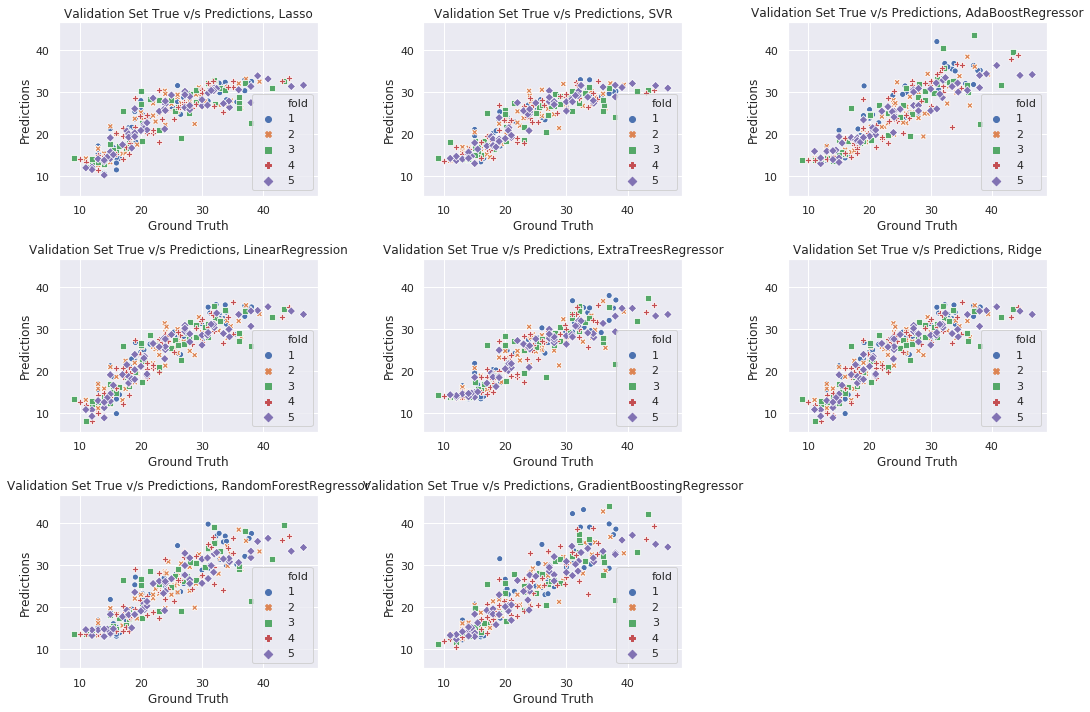

In [15]:
fig = pyplot.figure(1, (15,10))

for i,f in enumerate(model_prediction_files):
    if i==0:
        ax = pyplot.subplot(3,3,i+1)
    else:
        ax = pyplot.subplot(3,3,i+1, sharex=ax, sharey=ax)
    
    df = pd.read_csv(INPUT_PATH + f)
    sns.scatterplot(x='true', y='pred', hue='fold', style='fold', data=df,
                   palette=sns.color_palette(n_colors=5))
    ax.set_xlabel('Ground Truth')
    ax.set_ylabel('Predictions')
    pyplot.title("Validation Set True v/s Predictions, {}".format(f.split('.')[0].split('_')[1]))
    pyplot.tight_layout()

pyplot.savefig(IMG_PATH + 'model_validation_true_pred_plot.png')
pyplot.show()

del fig
del ax